In [9]:
print("Tugas Besar Dasar Kecerdasan Artificial")
print("Menentukan tingkat kelulusan seseorang memasuki perguruan tinggi pascasarjana berdasarkan dataset Graduate Asmisson")

Tugas Besar Dasar Kecerdasan Artificial
Menentukan tingkat kelulusan seseorang memasuki perguruan tinggi pascasarjana berdasarkan dataset Graduate Asmisson


In [11]:
print("Muhammad Abdillah Hafizh (103012300369)")
print("Bintang Kantata")
print("Nabil")

Muhammad Abdillah Hafizh (103012300369)
Bintang Kantata
Nabil


In [13]:
#import libraries
import numpy as np
import pandas as pd
import os
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [14]:
#memasukkan file
df = pd.read_csv("Admission_predict.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
# Hapus kolom "Serial No."
df.drop(columns=["Serial No."], inplace=True)

In [16]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
#cek apakah ada missing value
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [23]:
# Cek duplikat
df.duplicated().sum()

0

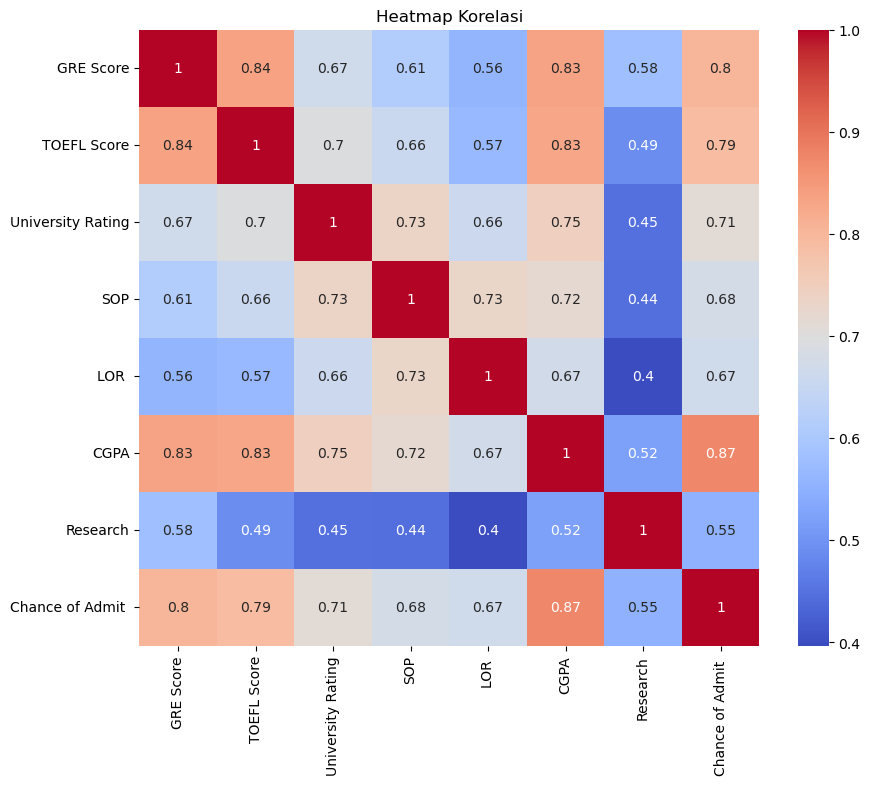

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

In [45]:
#mendefinisikan input dan output
GRE = ctrl.Antecedent(np.arange(260, 341, 1), 'GRE')
TOEFL = ctrl.Antecedent(np.arange(0, 121, 1), 'TOEFL')
CGPA = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'CGPA')
lulus = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'lulus')

In [47]:
#fungsi keanggotaan GRE
GRE['low']=fuzz.trimf(GRE.universe, [260, 280, 300])
GRE['med']=fuzz.trimf(GRE.universe, [290, 310, 320])
GRE['high']=fuzz.trimf(GRE.universe, [310, 325, 340])

#fungsi keangotaan TOEFl
TOEFL['low']=fuzz.trimf(TOEFL.universe, [0, 60, 80])
TOEFL['med']=fuzz.trimf(TOEFL.universe, [70, 85, 100])
TOEFL['high']=fuzz.trimf(TOEFL.universe, [90, 105, 120])

#fungsi keanggotaan CGPA
CGPA['low']=fuzz.trimf(CGPA.universe, [0.0, 5.0, 6.5])
CGPA['med']=fuzz.trimf(CGPA.universe, [6.0, 7.5, 9.0])
CGPA['high']=fuzz.trimf(CGPA.universe, [8.0, 9.0, 10.0])

#fungsi keanggotaan untuk lulus
lulus['low']=fuzz.trimf(lulus.universe, [0.0, 0.3, 0.5])
lulus['med']=fuzz.trimf(lulus.universe, [0.4, 0.6, 0.8])
lulus['high']=fuzz.trimf(lulus.universe, [0.7, 0.85, 1.0])

G:\anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


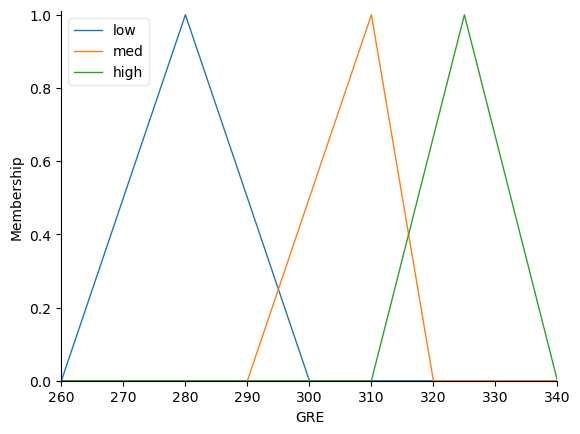

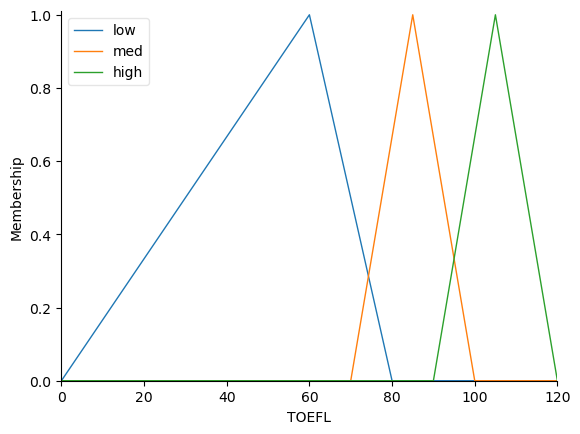

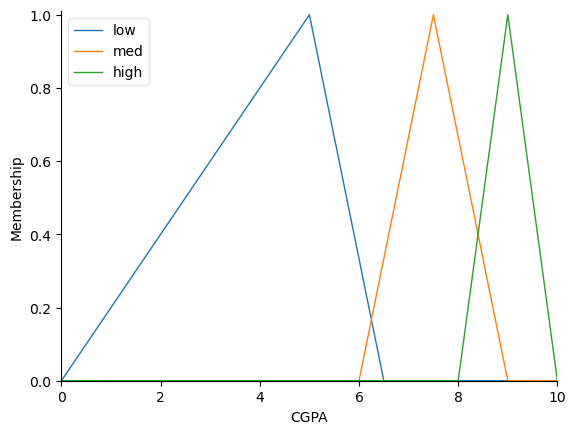

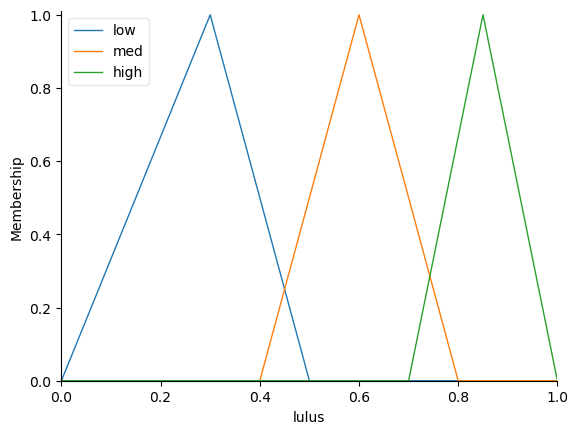

In [49]:
#tampilkan grafik
GRE.view()
TOEFL.view()
CGPA.view()
lulus.view()